In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn import svm 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [61]:
data = pd.read_csv('migration_nz.csv')
data.head(10)

,Measure,Country,Citizenship,Year,Value
0,Arrivals,Oceania,New Zealand Citizen,1979,11817.0
1,Arrivals,Oceania,Australian Citizen,1979,4436.0
2,Arrivals,Oceania,Total All Citizenships,1979,19965.0
3,Arrivals,Antarctica,New Zealand Citizen,1979,10.0
4,Arrivals,Antarctica,Australian Citizen,1979,0.0
5,Arrivals,Antarctica,Total All Citizenships,1979,13.0
6,Arrivals,American Samoa,New Zealand Citizen,1979,17.0
7,Arrivals,American Samoa,Australian Citizen,1979,4.0
8,Arrivals,American Samoa,Total All Citizenships,1979,30.0
9,Arrivals,Australia,New Zealand Citizen,1979,8224.0


In [62]:
data['Measure'].unique()

array(['Arrivals', 'Departures', 'Net'], dtype=object)

In [63]:
data['Measure'].replace("Arrivals",0,inplace=True)
data['Measure'].replace("Departures",1,inplace=True)
data['Measure'].replace("Net",2,inplace=True)

In [64]:
data['Measure'].unique()

array([0, 1, 2], dtype=int64)

In [65]:
data['Country'].unique()

array(['Oceania', 'Antarctica', 'American Samoa', 'Australia',
       'Cocos Islands', 'Cook Islands', 'Christmas Island', 'Fiji',
       'Micronesia', 'Guam', 'Kiribati', 'Marshall Islands',
       'Northern Mariana Islands', 'New Caledonia', 'Norfolk Island',
       'Nauru', 'Niue', 'New Zealand', 'French Polynesia',
       'Papua New Guinea', 'Pitcairn Island', 'Palau', 'Solomon Islands',
       'French Southern Territories', 'Tokelau', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Wallis and Futuna', 'Samoa', 'Asia', 'Afghanistan',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Brunei Darussalam',
       'Bhutan', 'China', 'Georgia', 'Hong Kong', 'Indonesia', 'India',
       'Japan', 'Kyrgyzstan', 'Cambodia', 'North Korea', 'South Korea',
       'Kazakhstan', 'Laos', 'Sri Lanka', 'Myanmar', 'Mongolia', 'Macau',
       'Maldives', 'Malaysia', 'Nepal', 'Philippines', 'Pakistan',
       'Singapore', 'Thailand', 'Tajikistan', 'Timor-Leste',
       'Turkmenistan', 'Taiwan', 'Uzbekistan', 'Vietn

In [66]:
data['CountryID'] = pd.factorize(data.Country)[0]
data['CitID'] = pd.factorize(data.Citizenship)[0]

In [67]:
data['CountryID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [68]:
data.isnull().sum()

Measure         0
Country         0
Citizenship     0
Year            0
Value          72
CountryID       0
CitID           0
dtype: int64

In [69]:
data["Value"].fillna(data["Value"].median(),inplace=True)

In [70]:
data.isnull().sum()

Measure        0
Country        0
Citizenship    0
Year           0
Value          0
CountryID      0
CitID          0
dtype: int64

In [71]:
data.drop('Country', axis=1, inplace=True)
data.drop('Citizenship', axis=1, inplace=True)

In [72]:
from sklearn.model_selection import train_test_split

X = data[['CountryID', 'Measure', 'Year', 'CitID']].values
Y = data['Value'].values

X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.3, random_state=9)


In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=70,max_features = 3,max_depth=5,n_jobs=-1)
rf.fit(X_train ,y_train)
rf.score(X_test, y_test)

0.7402160520729827

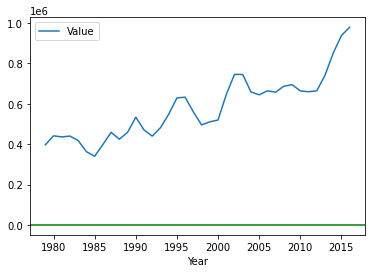

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

X = data[['CountryID', 'Measure', 'Year', 'CitID']]
Y = data['Value']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=9)
grouped = data.groupby(['Year']).aggregate({'Value': 'sum'})

# Growth of migration to New Zealand by year
grouped.plot(kind='line')
plt.axhline(0, color='g')
plt.show()

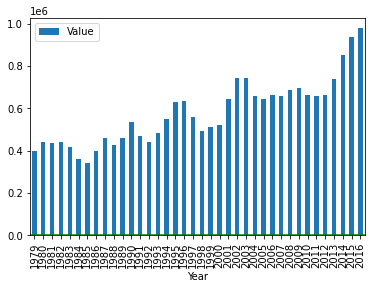

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped.plot(kind='bar')
plt.axhline(0, color='g')
plt.show()



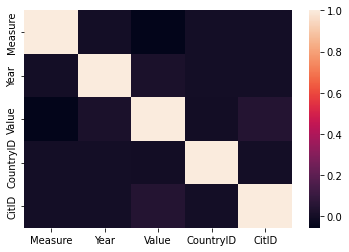

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()
